In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Import file on Colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving clean_data.csv to clean_data.csv


In [3]:
df = pd.read_csv('clean_data.csv')

File named as 'df' for data analytical purposes

In [4]:
df.describe()

,order_id,order_quantity,sales,discount,discount_value
count,5499.000000,5499.000000,5.499000e+03,5499.000000,5.499000e+03
mean,29970.202219,25.521549,3.532838e+06,0.049915,1.735048e+05
std,17243.318085,14.485352,7.305121e+06,0.031783,4.183615e+05
min,3.000000,1.000000,6.460000e+03,0.000000,0.000000e+00
25%,15044.500000,13.000000,2.826700e+05,0.020000,7.739000e+03
50%,29927.000000,26.000000,8.546400e+05,0.050000,3.191700e+04
75%,44646.500000,38.000000,3.298741e+06,0.080000,1.329000e+05
max,59973.000000,50.000000,1.781221e+08,0.170000,7.441778e+06


In [5]:
df.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,13/10/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,1/10/2012,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,10/7/2011,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,28/8/2010,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,17/6/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


Renaming each column to give a more professional and cleaner look

In [5]:
df.rename({'order_id': 'ID', 'order_status': 'Order Status', 'customer': 'Customer Name', 'order_date': 'Ordered Date', 'order_quantity': 'Quantity Ordered', 'sales': 'Sales Amount', 'discount' : 'Discount', 
           'discount_value': 'Discount value', 'product_category': 'Category', 'product_sub_category': 'Sub Category'}, axis = 1, inplace = True)

Mistake made in naming columns as Ordered Data instead of Ordered Date

In [45]:
df.head(10)

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category
0,3,Order Finished,Muhammed Mac Intyre,13/10/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,1/10/2012,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,10/7/2011,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,28/8/2010,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,17/6/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories
5,643,Order Finished,Monica Federle,24/3/2011,21,5563640,0.07,389455,Office Supplies,Storage & Organization
6,678,Order Returned,Dorothy Badders,26/2/2010,44,456820,0.07,31977,Office Supplies,Paper
7,807,Order Finished,Neola Schneider,23/11/2010,45,393700,0.01,3937,Office Supplies,Paper
8,868,Order Finished,Carlos Daly,8/6/2012,32,1433680,0.00,0,Office Supplies,Appliances
9,933,Order Finished,Claudia Miner,4/8/2012,15,161220,0.02,3224,Office Supplies,Binders & Binder Accessories


Looking at the data types in the dataframe 'df'

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5499 non-null   int64  
 1   Order Status      5499 non-null   object 
 2   Customer Name     5499 non-null   object 
 3   Ordered Date      5499 non-null   object 
 4   Quantity Ordered  5499 non-null   int64  
 5   Sales Amount      5499 non-null   int64  
 6   Discount          5499 non-null   float64
 7   Discount value    5499 non-null   int64  
 8   Category          5499 non-null   object 
 9   Sub Category      5499 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.7+ KB


Next, looking at the null values present in the dataset

In [14]:
df.isnull().sum()

ID                  0
Order Status        0
Customer Name       0
Ordered Date        0
Quantity Ordered    0
Sales Amount        0
Discount            0
Discount value      0
Category            0
Sub Category        0
dtype: int64

Next, for EDA purposes, the Ordered Date table must be changed to datetime

In [35]:
df['Ordered Date'] = pd.to_datetime(df['Ordered Date'])
df.head()

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category,Year,Net Revenue
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,2010,502157
1,293,Order Finished,Barry French,2012-01-10,49,20246040,0.07,1417223,Office Supplies,Appliances,2012,18828817
2,483,Order Finished,Clay Rozendal,2011-10-07,30,9931519,0.08,794522,Technology,Telephones & Communication,2011,9136997
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,2010,725457
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,2011,181468


A new column called 'Year' is added to the dataframe 'df'

In [34]:
df['Year'] = pd.DatetimeIndex(df['Ordered Date']).year
df['Year']

0       2010
1       2012
2       2011
3       2010
4       2011
        ... 
5494    2010
5495    2012
5496    2011
5497    2010
5498    2009
Name: Year, Length: 5499, dtype: int64

The dataset is then grouped by the Year column, and aggregate function is performed for the sales column and ID column

In [52]:
agg_df = df.loc[df['Order Status']=='Order Finished']
agg_df['Order Status'].shape

agg_df.head()

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category,Year
0,3,Order Finished,Muhammed Mac Intyre,13/10/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization,2010
1,293,Order Finished,Barry French,1/10/2012,49,20246040,0.07,1417223,Office Supplies,Appliances,2012
2,483,Order Finished,Clay Rozendal,10/7/2011,30,9931519,0.08,794522,Technology,Telephones & Communication,2011
3,515,Order Finished,Carlos Soltero,28/8/2010,19,788540,0.08,63083,Office Supplies,Appliances,2010
4,613,Order Finished,Carl Jackson,17/6/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,2011


In [53]:
agg_df = agg_df.groupby(agg_df['Year']).agg({'Sales Amount': 'sum', 'ID': pd.Series.nunique}).sort_values('Year', ascending=True)
agg_df = agg_df.rename(columns={'ID': 'Number of Orders'})

Once the columns have been grouped by the 'Order Finished' status in the Order Status, the aggregate function can now be performed.

In [54]:
agg_df

,Sales Amount,Number of Orders
Year,,
2009,4613872681,1244
2010,4059100607,1248
2011,4112036186,1178
2012,4482983158,1254


Hence, the sum of sales amount per year is summarized via the number of orders per year. 

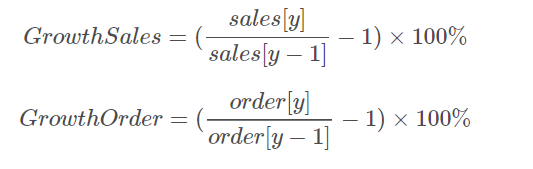

Based on the formula above, Sales Growth  and Growth Order is calculated

In [55]:
i=0
GrowthSales = []
while i <len(agg_df):
    if i ==0:
        GrowthSales.append(0)
        i+=1
    
    GrowthSales.append(round(((agg_df.iloc[i,0]/agg_df.iloc[i-1,0])-1),2))
    i+=1
GrowthSales

[0, -0.12, 0.01, 0.09]

In [56]:
agg_df['GrowthSales%'] = GrowthSales
agg_df['GrowthSales%']

Year
2009    0.00
2010   -0.12
2011    0.01
2012    0.09
Name: GrowthSales%, dtype: float64

As shown in the Growth Sales column above, the sales dropped by 12% from 2009 - 2010. In 2011, sales increases by 1% from the previous year. In 2012, sales increased by 9% compared to 2011

In [57]:
i=0
GrowthOrder = []
while i <len(agg_df):
    if i ==0:
        GrowthOrder.append(0)
        i+=1
    
    GrowthOrder.append(round(((agg_df.iloc[i,1]/agg_df.iloc[i-1,1])-1),3))
    i+=1
GrowthOrder

[0, 0.003, -0.056, 0.065]

In [58]:
agg_df['GrowthOrder%'] = GrowthOrder
agg_df['GrowthOrder%']

Year
2009    0.000
2010    0.003
2011   -0.056
2012    0.065
Name: GrowthOrder%, dtype: float64

From the GrowthOrder table above, the order grew by 0.3% in 2010 compared to the previous year. In 2011, the order growth decreased by 5.6%, and in 2012 the order growth increased by 6.5% compared to the previous year.

In [59]:
agg_df

,Sales Amount,Number of Orders,GrowthSales%,GrowthOrder%
Year,,,,
2009,4613872681,1244,0.00,0.000
2010,4059100607,1248,-0.12,0.003
2011,4112036186,1178,0.01,-0.056
2012,4482983158,1254,0.09,0.065


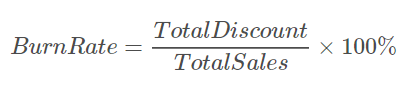

To calculate BurnRate, the data is filtered by Order Status of 'Order Finished'

In [60]:
br = df.loc[(df['Order Status']=='Order Finished')]
br.head()

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category,Year
0,3,Order Finished,Muhammed Mac Intyre,13/10/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization,2010
1,293,Order Finished,Barry French,1/10/2012,49,20246040,0.07,1417223,Office Supplies,Appliances,2012
2,483,Order Finished,Clay Rozendal,10/7/2011,30,9931519,0.08,794522,Technology,Telephones & Communication,2011
3,515,Order Finished,Carlos Soltero,28/8/2010,19,788540,0.08,63083,Office Supplies,Appliances,2010
4,613,Order Finished,Carl Jackson,17/6/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,2011


The columns are again grouped by the Year column, to perform aggregate function for Sales

In [61]:
br = br.groupby(['Year',]).agg({'Sales Amount': 'sum', 'Discount value':'sum'})
br

,Sales Amount,Discount value
Year,,
2009,4613872681,214330327
2010,4059100607,197506939
2011,4112036186,214611556
2012,4482983158,225867642


Burn rate percentage column is now created

In [62]:
br['Burn Rate %'] = ((br['Discount value'] / br['Sales Amount'])).round(4)
br = br.rename(columns={'Discount value': 'Promotion Value'})

In [63]:
br

,Sales Amount,Promotion Value,Burn Rate %
Year,,,
2009,4613872681,214330327,0.0465
2010,4059100607,197506939,0.0487
2011,4112036186,214611556,0.0522
2012,4482983158,225867642,0.0504


The burn rate in 2009 is 4.65%, which increased to 4.87% in 2010. In 2011, the burn rate is 5.22%, which dropped to 5.04% in 2012.

Next, the calculation of analysis per customer is performed. The dataframe df is filtered via Order Status = Order Finished

In [7]:
calc = df.loc[(df['Order Status']=='Order Finished')]
calc

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category
0,3,Order Finished,Muhammed Mac Intyre,13/10/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,1/10/2012,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,10/7/2011,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,28/8/2010,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,17/6/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories
...,...,...,...,...,...,...,...,...,...,...
5494,47360,Order Finished,Philip Brown,8/10/2010,25,4401280,0.05,220064,Furniture,Chairs & Chairmats
5495,52706,Order Finished,Paul Prost,9/7/2012,34,2083320,0.02,41666,Office Supplies,Binders & Binder Accessories
5496,54279,Order Finished,Lisa De Cherney,30/7/2011,41,20142180,0.10,2014218,Technology,Office Machines
5497,55558,Order Finished,Philip Brown,9/8/2010,8,2588080,0.05,129404,Furniture,Bookcases


In [15]:
calc = calc.sort_values('Ordered Date', ascending=True)

In [16]:
calc['Customer Name'] = calc['Customer Name'].drop_duplicates()

In [17]:
calc

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category
2897,28774,Order Finished,Jessica Myrick,1/1/2009,32,360720,0.10,36072,Office Supplies,Storage & Organization
4660,39841,Order Finished,Benjamin Venier,1/1/2010,43,588260,0.01,5883,Office Supplies,Paper
3519,59174,Order Finished,Emily Ducich,1/1/2010,6,2386200,0.09,214758,Technology,Office Machines
21,2277,Order Finished,Don Miller,1/1/2011,10,133080,0.01,1331,Technology,Computer Peripherals
3489,52640,Order Finished,Steven Ward,1/1/2011,18,2327500,0.05,116375,Office Supplies,Binders & Binder Accessories
...,...,...,...,...,...,...,...,...,...,...
4284,34151,Order Finished,NaN,9/9/2011,26,8194289,0.10,819429,Technology,Telephones & Communication
3880,32804,Order Finished,NaN,9/9/2012,49,349620,0.07,24473,Office Supplies,Labels
2618,11874,Order Finished,NaN,9/9/2012,1,80580,0.00,0,Technology,Computer Peripherals
2265,17959,Order Finished,NaN,9/9/2012,28,2403360,0.01,24034,Office Supplies,Paper


The columns of Customer Name contains Missing values, and the missing values would be dropped

In [18]:
calc.dropna(how='any' , inplace=True)

In [28]:
calc

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category
2897,28774,Order Finished,Jessica Myrick,1/1/2009,32,360720,0.10,36072,Office Supplies,Storage & Organization
4660,39841,Order Finished,Benjamin Venier,1/1/2010,43,588260,0.01,5883,Office Supplies,Paper
3519,59174,Order Finished,Emily Ducich,1/1/2010,6,2386200,0.09,214758,Technology,Office Machines
21,2277,Order Finished,Don Miller,1/1/2011,10,133080,0.01,1331,Technology,Computer Peripherals
3489,52640,Order Finished,Steven Ward,1/1/2011,18,2327500,0.05,116375,Office Supplies,Binders & Binder Accessories
...,...,...,...,...,...,...,...,...,...,...
5114,44995,Order Finished,Maria Etezadi,6/8/2009,46,2438497,0.01,24385,Technology,Telephones & Communication
2594,3591,Order Finished,Herbert Flentye,7/12/2010,3,643140,0.01,6431,Office Supplies,Appliances
3570,26951,Order Finished,Kean Takahito,8/4/2010,3,903620,0.05,45181,Technology,Office Machines
3891,40225,Order Finished,Frank Gastineau,9/1/2011,50,1678140,0.06,100688,Office Supplies,Binders & Binder Accessories


Next, customer retention is calculated

In [29]:
df['Net Revenue'] = df['Sales Amount'] - df['Discount value']
ca_2012 = df.loc[(df['Order Status']=='Order Finished')]
ca_2012 = ca_2012.loc[(df['Year']==2012)]
ca_2012 = ca_2012.sort_values('Ordered Date', ascending=True)

In [30]:
ca_2012.head()

,ID,Order Status,Customer Name,Ordered Date,Quantity Ordered,Sales Amount,Discount,Discount value,Category,Sub Category,Year,Net Revenue
670,51648,Order Finished,Roy Skaria,1/1/2012,45,4709600,0.03,141288,Technology,Computer Peripherals,2012,4568312
1,293,Order Finished,Barry French,1/10/2012,49,20246040,0.07,1417223,Office Supplies,Appliances,2012,18828817
4149,20579,Order Finished,Jim Epp,1/10/2012,16,2868172,0.10,286817,Technology,Telephones & Communication,2012,2581355
4336,929,Order Finished,Luke Foster,1/10/2012,21,455320,0.04,18213,Technology,Computer Peripherals,2012,437107
541,22980,Order Finished,Rob Haberlin,1/10/2012,17,448180,0.00,0,Office Supplies,Storage & Organization,2012,448180


Based on Net Revenue column, a scatter plot of Net Revenue per year is generated

(array([5.28e+03, 1.64e+02, 4.90e+01, 4.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]),
 array([6.07200000e+03, 1.78176748e+07, 3.56292776e+07, 5.34408804e+07,
        7.12524832e+07, 8.90640860e+07, 1.06875689e+08, 1.24687292e+08,
        1.42498894e+08, 1.60310497e+08, 1.78122100e+08]),
 <a list of 10 Patch objects>)

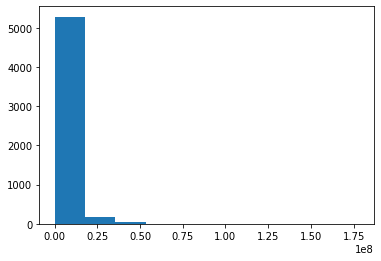

In [55]:
plt.hist(df['Net Revenue'])

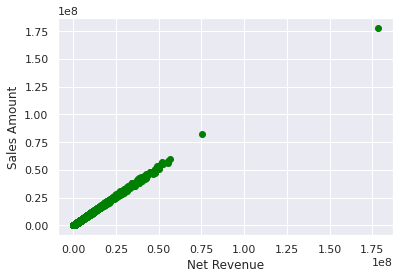

In [61]:
x=df['Net Revenue']
y=df['Sales Amount']
plt.scatter(x,y,c="green")
plt.xlabel("Net Revenue")
plt.ylabel("Sales Amount")
plt.show()